In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.colors import LogNorm

In [2]:
#Read in data
data = Table.read("data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits")
display(data.to_pandas().head())

,x,y,z,A_O
0,10.020546,-15.421509,-3.241711,8.428943
1,-13.487837,5.663507,-0.802306,8.671107
2,6.642289,-0.138942,-0.585961,8.891596
3,0.203939,4.112373,-0.147622,8.977195
4,-20.824045,6.971037,-1.758061,8.326950


In [21]:
# Create radius column
# data["r"] = np.sqrt(data["x"]**2 + data["y"]**2 + data["z"]**2)
data["r"] = np.sqrt(data["x"]**2 + data["y"]**2)

In [57]:
#Perform linear fit
fit = linregress(data["r"], data["A_O"])
AO_fit = fit.slope*data["r"] + fit.intercept
residual = data["A_O"] - AO_fit
print(fit)
print("R^2 =", fit.rvalue**2)

LinregressResult(slope=-0.03419647244360147, intercept=9.127839345362716, rvalue=-0.9552693175922453, pvalue=0.0, stderr=1.4802363801498309e-05, intercept_stderr=0.00023227643278613057)
R^2 = 0.9125394691331541


In [ ]:
# Set up figure
fig,axs = plt.subplots(1, 2, figsize=(16,6))
ax1 = axs[0]
ax2 = axs[1]

# 2d Histogram of A(O) vs R
hist, x, y, mesh = ax1.hist2d(data["r"], data["A_O"], bins=100, density=True, cmap="plasma", norm=LogNorm())

ax1.plot(data["r"], AO_fit, color="cyan")
plt.colorbar(mesh, ax=ax1, label="Point density")
ax1.set_xlabel("$R_{gal}$ (kpc)")
ax1.set_ylabel("Gas phase metallicity A(O)")
ax1.legend([f"A(O) = {fit.slope:.5f}" + "$R_{gal}$" + f" +{fit.intercept:.4f}"])

# 2d Histogram of residuals
hist, x, y, mesh2 = ax2.hist2d(data["r"], residual, bins=100, density=True, cmap="copper", norm=LogNorm())
ax2.hlines(0, 0, max(data["r"]), color="red", label="$\Delta$A(O) = 0")

plt.colorbar(mesh2, ax=ax2, label="Point density")
ax2.set_xlabel("$R_{gal}$ (kpc)")
ax2.set_ylabel("Residuals $\Delta$A(O)")
ax2.legend()

plt.savefig("figures/q3_AOfit.png", dpi=200, bbox_inches="tight")

plt.show()

The simple linear fit gives us fitting parameters of 
$$A(O) = (-0.03420 \pm 0.00002)R_{gal} + (9.1278 \pm 0.0002)$$
with no hyperparameters. The correlation coefficient is $R^2 = 0.9125$ and the p-value is reported as 0.0 (i.e. too small for double precision numbers). The small p-value implies that there is a high likelihood for a fundamental relationship existing, and the $R^2$ value shows a convincing but not perfect fit. Visually, the residual plot shows that the scatter increases over radius. The RMS can be used to quantify this increasing scatter over radius, using the below plot.

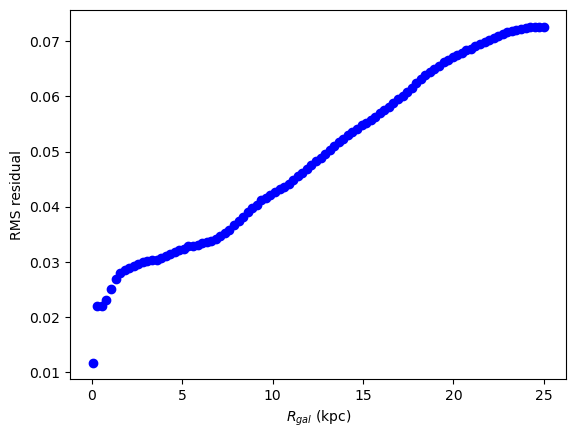

In [63]:
for i in np.linspace(0.01+min(data["r"]), max(data["r"]), 100):
    plt.scatter(i, np.sqrt(np.mean(residual[data["r"]<i]**2)), color="blue")

plt.xlabel("$R_{gal}$ (kpc)")
plt.ylabel("RMS residual")

plt.show()

The RMS starts at ~0.03 for low radii and increases to ~0.07 near the end. This means A(O) can be safely determined down to one decimal point from the fit.